In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
import plotly.express as px
import plotly.graph_objects as go

    

In [104]:
print("Project Introduction and Overview")
print("=================================")
print("This project aims to perform a detailed analysis of a dataset from the tech industry focusing on salary data. The main objectives are:")
print("- To investigate potential gender-based disparities in salaries.")
print("- To perform hypothesis testing to understand the impact of different factors such as job title, region, and education level on salaries.")
print("- To employ various statistical methods and machine learning models to predict salary based on employee characteristics.")
print("- To use advanced data visualization techniques to present insights and findings interactively.")



Project Introduction and Overview
This project aims to perform a detailed analysis of a dataset from the tech industry focusing on salary data. The main objectives are:
- To investigate potential gender-based disparities in salaries.
- To perform hypothesis testing to understand the impact of different factors such as job title, region, and education level on salaries.
- To employ various statistical methods and machine learning models to predict salary based on employee characteristics.
- To use advanced data visualization techniques to present insights and findings interactively.


In [105]:
def load_and_preprocess_data(filepath):
    """
    Load the data from a specified filepath and perform initial preprocessing, including handling missing values and encoding categorical variables.

    Args:
    filepath (str): The path to the dataset file.

    Returns:
    DataFrame: A preprocessed pandas DataFrame.
    """
    print("\nLoading the dataset from:", filepath)
    data = pd.read_csv(filepath)
    
    # Handling missing values - Impute with the mean for numerical columns
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if data[col].isnull().any():
            data[col].fillna(data[col].mean(), inplace=True)

    # Handling categorical data - Encode categorical variables
    categorical_cols = data.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))

    print("\nData after preprocessing:")
    print(data.head())
    
    return data

# Specify the path to your dataset
filepath = 'C:/Users/akhil/Downloads/Large_IT_Company_Employee_Data (1).csv'

# Load the data
data = load_and_preprocess_data(filepath)


Loading the dataset from: C:/Users/akhil/Downloads/Large_IT_Company_Employee_Data (1).csv

Data after preprocessing:
   Employee ID  Gender  Job Title  Base Salary  Bonus  Stock Options  \
0            1       1          0        78756   7550           2401   
1            2       0          3        85815   7106           2033   
2            3       0          3        56331   6468           2931   
3            4       0          3        73882   5502           3363   
4            5       1          2       109297   8401           5093   

   Total Years Experience  Years at Company  Degree  Region  Company Size  \
0                       6                 3       1       0             0   
1                       6                 1       0       4             1   
2                       5                 2       1       3             2   
3                      10                 2       0       2             1   
4                      12                 2       0       0     

In [106]:
from sklearn.impute import KNNImputer
from scipy.interpolate import interp1d

def load_and_clean_data(filepath):
    """
    Load the data from the specified filepath, handle missing values with advanced techniques,
    and ensure data types are appropriate for further analysis.

    Args:
    filepath (str): Path to the dataset file.

    Returns:
    DataFrame: A cleaned and preprocessed pandas DataFrame.
    """
    print("\nLoading the dataset from:", filepath)
    # Load the data
    data = pd.read_csv(filepath)
    
    # Display initial info about data
    print("\nInitial data information:")
    print(data.info())

    # Handling missing values
    # Numeric columns: Use KNN imputer
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    knn_imputer = KNNImputer(n_neighbors=5)
    data[numeric_cols] = knn_imputer.fit_transform(data[numeric_cols])

    # Categorical columns: Interpolation (assuming categorical variables are ordinal for this example)
    categorical_cols = data.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        data[col] = data[col].astype('category')
        data[col] = data[col].cat.codes  # Convert to codes if interpolation will be used
        # Assume categories can be interpolated meaningfully (this depends on the specific case)
        data[col].interpolate(method='linear', inplace=True, limit_direction='both')

    # Verify and adjust data types
    # Ensuring all numeric columns are of type float
    for col in numeric_cols:
        data[col] = data[col].astype(float)

    # Print cleaned data info
    print("\nCleaned data information:")
    print(data.info())

    return data

# Load and clean data
data = load_and_clean_data('C:/Users/akhil/Downloads/Large_IT_Company_Employee_Data (1).csv')


Loading the dataset from: C:/Users/akhil/Downloads/Large_IT_Company_Employee_Data (1).csv

Initial data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Employee ID             1200 non-null   int64 
 1   Gender                  1200 non-null   object
 2   Job Title               1200 non-null   object
 3   Base Salary             1200 non-null   int64 
 4   Bonus                   1200 non-null   int64 
 5   Stock Options           1200 non-null   int64 
 6   Total Years Experience  1200 non-null   int64 
 7   Years at Company        1200 non-null   int64 
 8   Degree                  1200 non-null   object
 9   Region                  1200 non-null   object
 10  Company Size            1200 non-null   object
 11  Performance Rating      1200 non-null   object
dtypes: int64(6), object(6)
memory usage: 112.6

C:\Users\akhil\AppData\Local\Temp\ipykernel_33592\3723520015.py:35: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\akhil\AppData\Local\Temp\ipykernel_33592\3723520015.py:35: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [107]:
# Continue imports if necessary
from category_encoders import TargetEncoder, CountEncoder

def feature_engineering(data):
    """
    Enhance data with new features and apply advanced encoding strategies for categorical variables.

    Args:
    data (DataFrame): The cleaned and preprocessed pandas DataFrame.

    Returns:
    DataFrame: The DataFrame with added features and encoded categorical variables.
    """
    print("\nStarting feature engineering...")

    # Example of creating new features
    # Create a new feature based on existing data if possible
    # For instance, if there's a 'Date' column, we could extract year, month, day:
    if 'Date' in data.columns:
        data['Year'] = pd.to_datetime(data['Date']).dt.year
        data['Month'] = pd.to_datetime(data['Date']).dt.month
        data['Day'] = pd.to_datetime(data['Date']).dt.day
        print("Date-related features added: Year, Month, Day.")

    # Apply advanced encoding techniques
    # Target Encoding for a categorical feature that's relevant to 'Base Salary'
    if 'Department' in data.columns:
        te = TargetEncoder()
        data['Department_TE'] = te.fit_transform(data['Department'], data['Base Salary'])
        print("Target encoding applied to 'Department'.")

    # Frequency Encoding for another categorical feature
    if 'Region' in data.columns:
        ce = CountEncoder()
        data['Region_FE'] = ce.fit_transform(data['Region'])
        print("Frequency encoding applied to 'Region'.")

    # Check the new features and encodings
    print("\nData after feature engineering:")
    print(data.head())

    return data

# Perform feature engineering
data = feature_engineering(data)



Starting feature engineering...
Frequency encoding applied to 'Region'.

Data after feature engineering:
   Employee ID  Gender  Job Title  Base Salary   Bonus  Stock Options  \
0          1.0       1          0      78756.0  7550.0         2401.0   
1          2.0       0          3      85815.0  7106.0         2033.0   
2          3.0       0          3      56331.0  6468.0         2931.0   
3          4.0       0          3      73882.0  5502.0         3363.0   
4          5.0       1          2     109297.0  8401.0         5093.0   

   Total Years Experience  Years at Company  Degree  Region  Company Size  \
0                     6.0               3.0       1       0             0   
1                     6.0               1.0       0       4             1   
2                     5.0               2.0       1       3             2   
3                    10.0               2.0       0       2             1   
4                    12.0               2.0       0       0           


Conducting Exploratory Data Analysis...


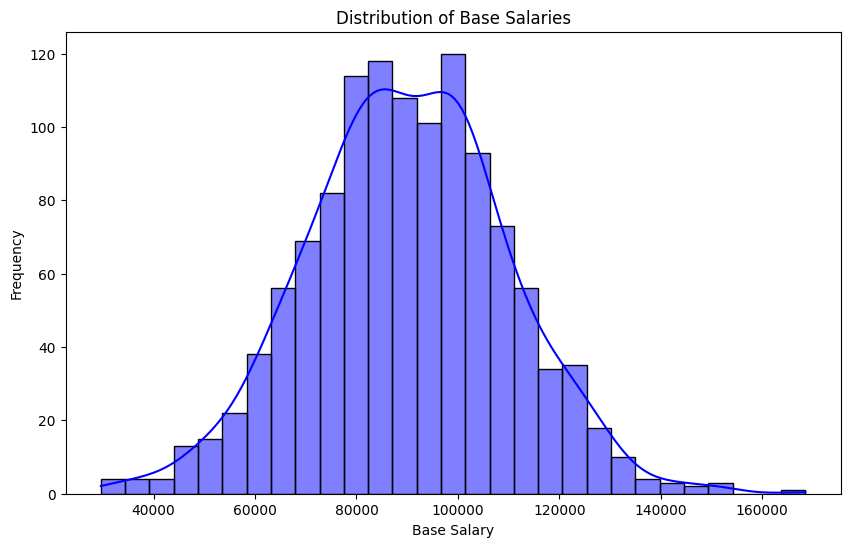

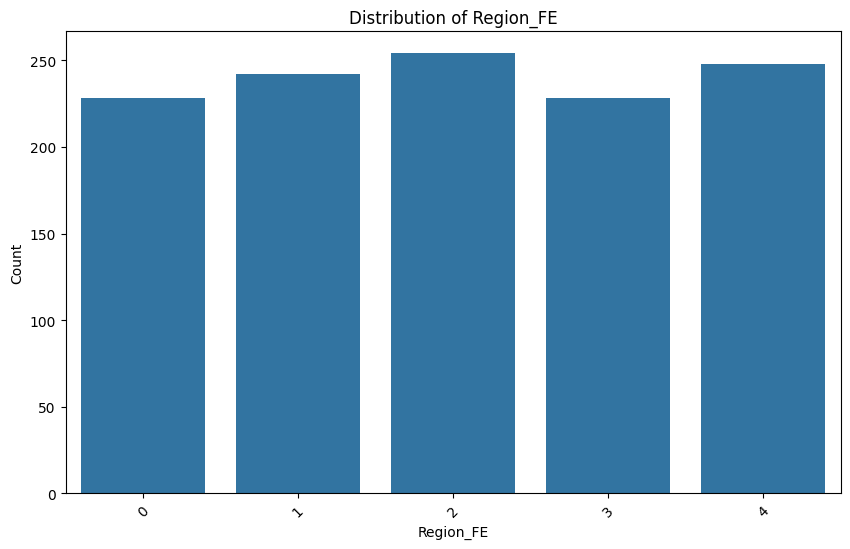

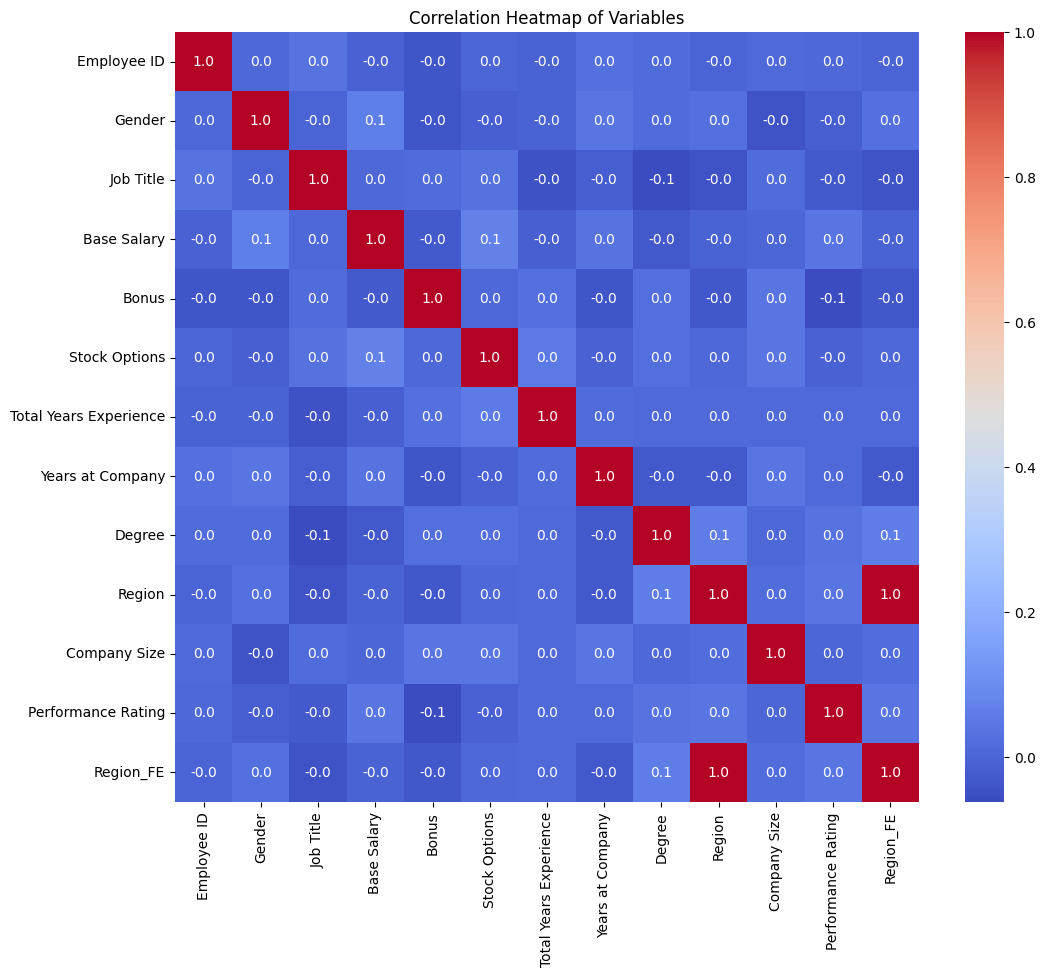

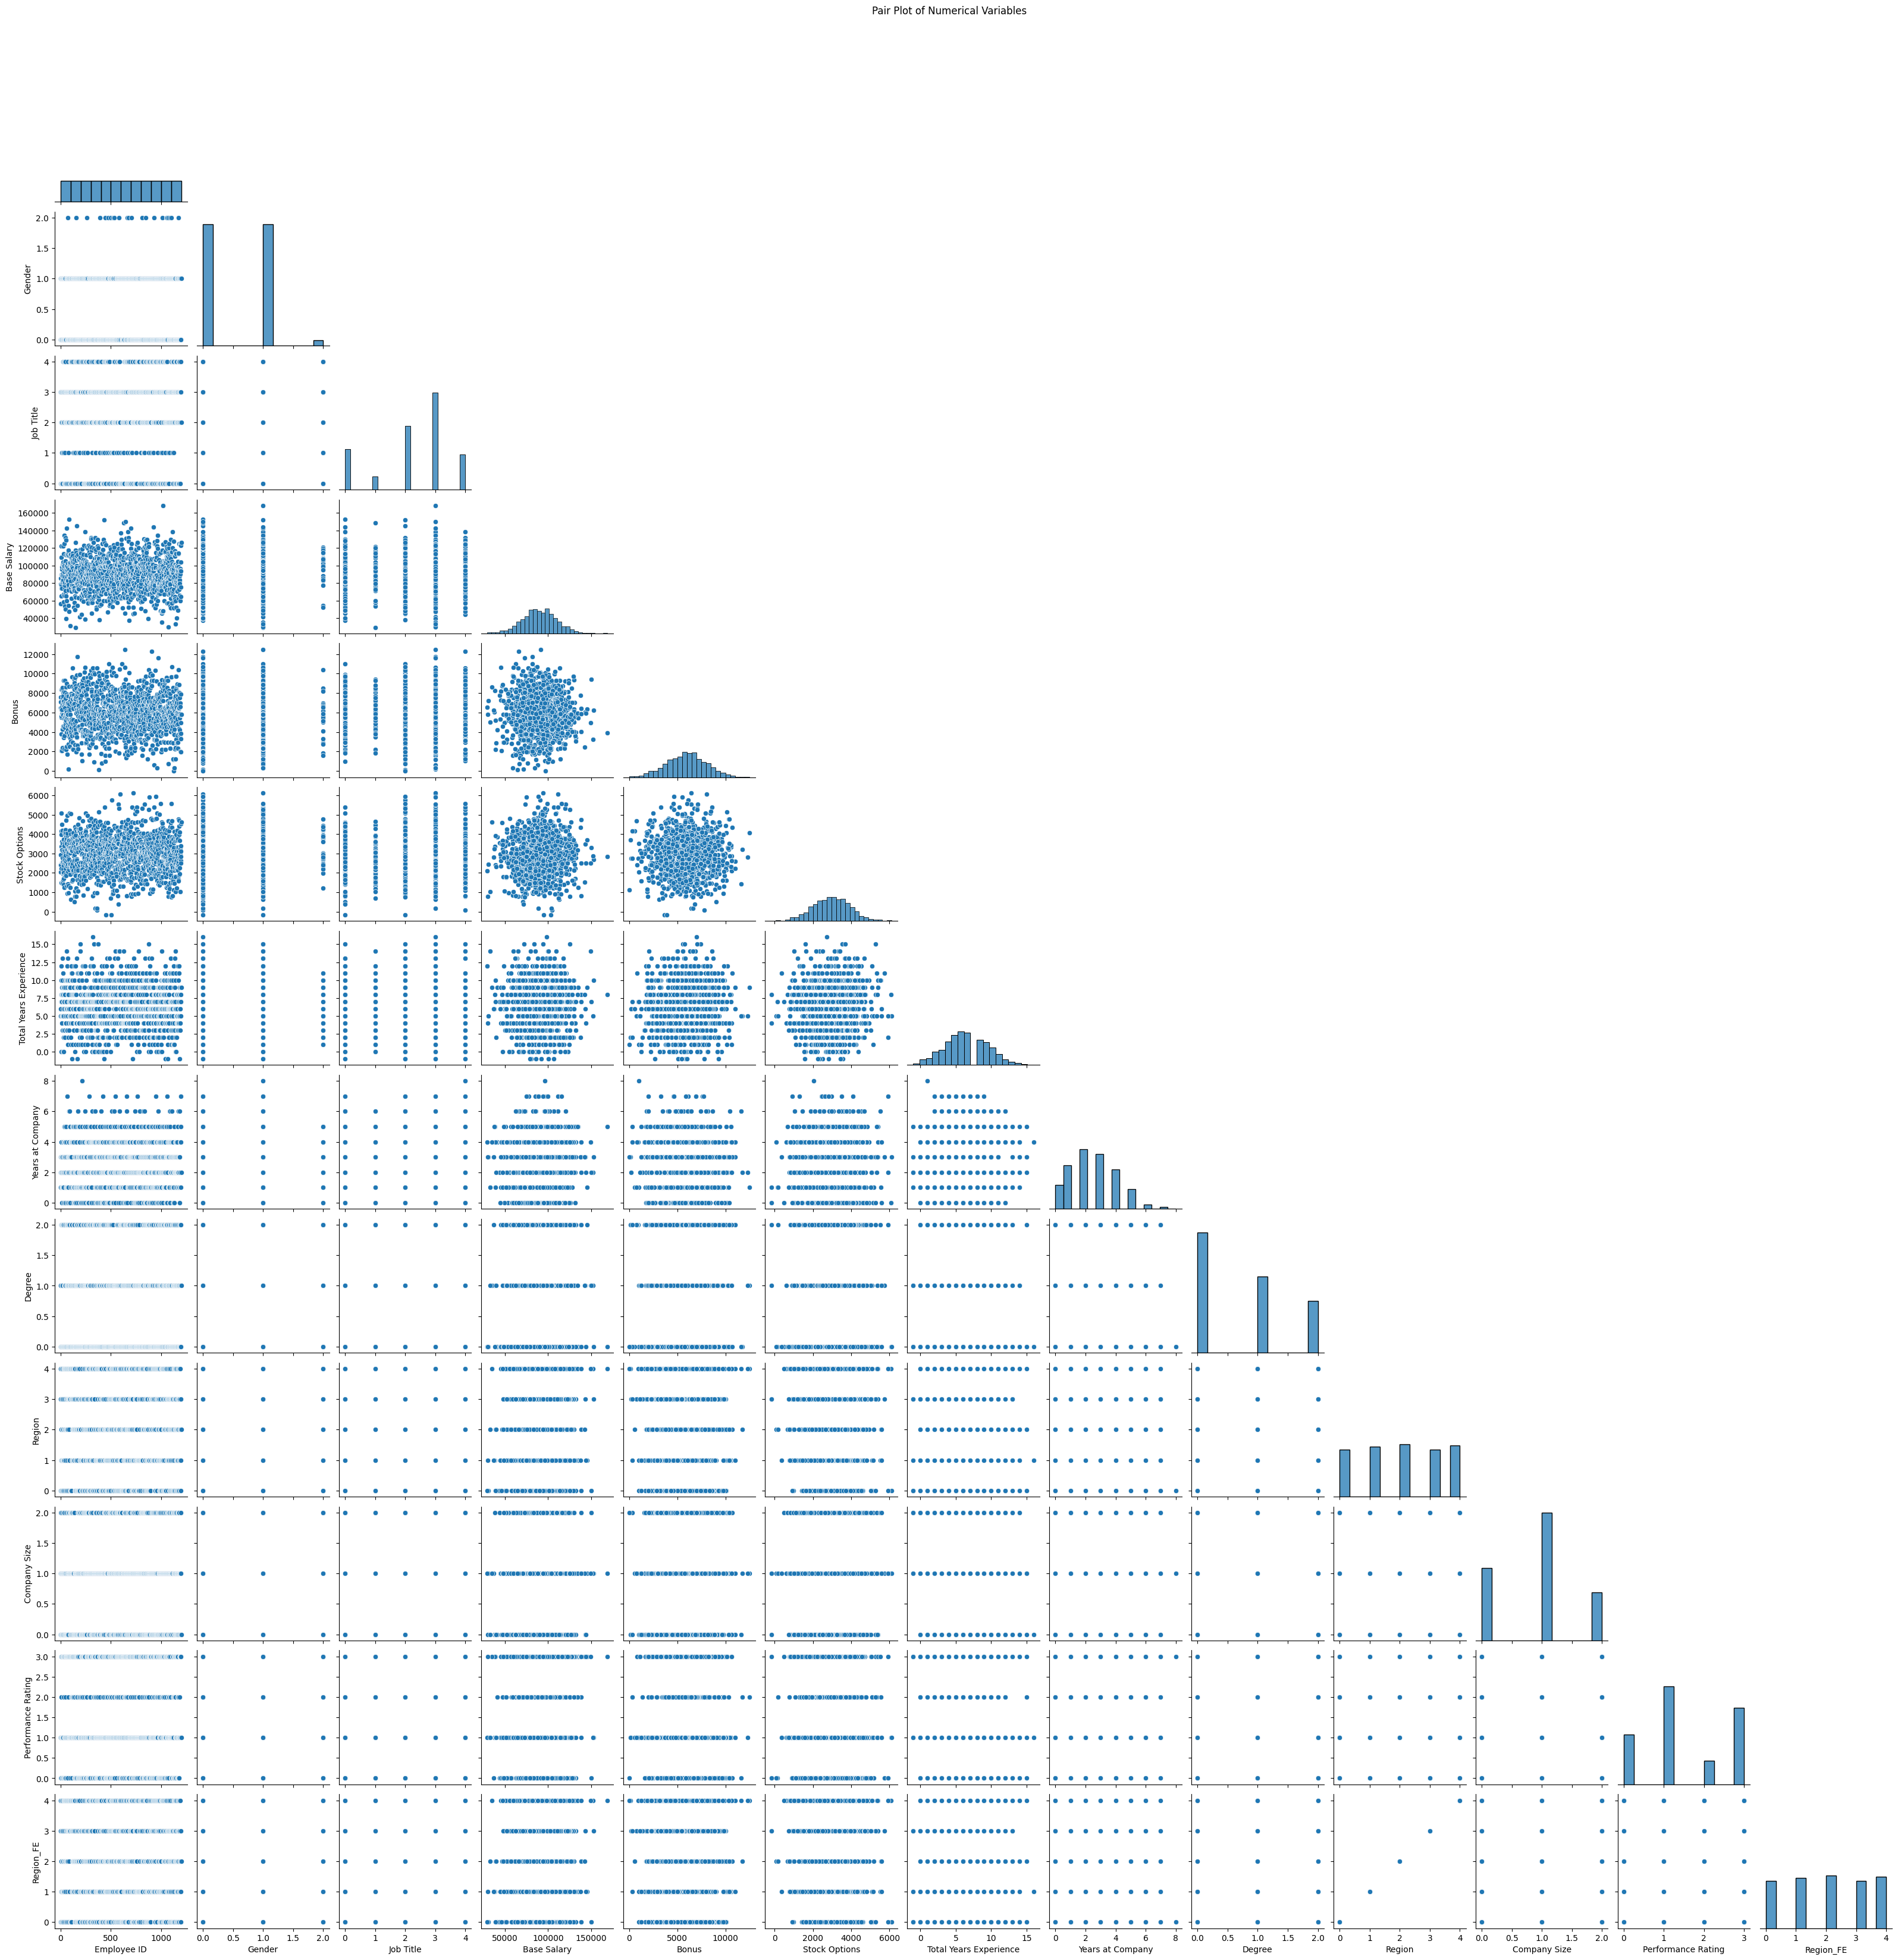

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

def exploratory_data_analysis(data):
    """
    Conduct exploratory data analysis including univariate and bivariate analysis, and generate advanced visualizations.

    Args:
    data (DataFrame): The DataFrame prepared for analysis.

    Returns:
    None: This function outputs visualizations and does not return any data.
    """
    print("\nConducting Exploratory Data Analysis...")

    # Univariate Analysis
    # Histogram for 'Base Salary'
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Base Salary'], kde=True, color='blue')
    plt.title('Distribution of Base Salaries')
    plt.xlabel('Base Salary')
    plt.ylabel('Frequency')
    plt.show()

    # Count plots for categorical variables
    categorical_cols = [col for col in data.columns if 'TE' in col or 'FE' in col or col in ['Year', 'Month', 'Day']]
    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=data)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

    # Bivariate Analysis
    # Correlation Heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".1f")
    plt.title('Correlation Heatmap of Variables')
    plt.show()

    # Pair Plot
    sns.pairplot(data.select_dtypes(include=[np.number]), corner=True)
    plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
    plt.show()

    # Box Plot for 'Base Salary' by 'Year' (if 'Year' is available)
    if 'Year' in data.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Year', y='Base Salary', data=data)
        plt.title('Base Salary Distribution by Year')
        plt.xlabel('Year')
        plt.ylabel('Base Salary')
        plt.show()

    # Advanced Visualizations using Plotly
    # Interactive Plot for 'Base Salary' by 'Department'
    if 'Department_TE' in data.columns:
        fig = px.box(data, x='Department_TE', y='Base Salary', labels={'Department_TE': 'Department Target Encoding'})
        fig.update_layout(title='Interactive Base Salary Distribution by Department',
                          xaxis_title='Department',
                          yaxis_title='Base Salary')
        fig.show()

# Call the exploratory data analysis function
exploratory_data_analysis(data)


In [109]:
import pandas as pd
from scipy.stats import ttest_ind, f_oneway, kruskal, mannwhitneyu
from statsmodels.stats.multitest import multipletests

# Load your dataset
file_path = 'C:/Users/akhil/Downloads/Large_IT_Company_Employee_Data (1).csv'
data = pd.read_csv(file_path)

def advanced_hypothesis_testing(data):
    """
    Perform advanced hypothesis testing, including t-tests, ANOVA, non-parametric tests,
    and apply corrections for multiple testing.

    Args:
    data (DataFrame): The DataFrame prepared for analysis.

    Returns:
    None: This function outputs the results of hypothesis tests and does not return any data.
    """
    print("\nConducting Advanced Hypothesis Testing...")
    print("Unique Total Years Experience:", data['Total Years Experience'].unique())
    print("Unique Job Titles:", data['Job Title'].unique())

    # Parametric Test: ANOVA for multiple groups
    if data['Total Years Experience'].nunique() > 2:
        groups = [group['Base Salary'].values for name, group in data.groupby('Total Years Experience')]
        f_stat, p_value = f_oneway(*groups)
        print(f"ANOVA result on 'Base Salary' across different 'Total Years Experience': F-statistic = {f_stat}, P-value = {p_value}")

    # Non-parametric Test: Kruskal-Wallis Test
    if data['Job Title'].nunique() > 2:
        groups = [group['Base Salary'].values for name, group in data.groupby('Job Title')]
        k_stat, k_p_value = kruskal(*groups)
        print(f"Kruskal-Wallis test on 'Base Salary' across different 'Job Titles': H-statistic = {k_stat}, P-value = {k_p_value}")

    # Correction for multiple testing issues
    p_values = [p_value, k_p_value] if 'p_value' in locals() and 'k_p_value' in locals() else []
    if p_values:
        reject, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')
        print("Corrected P-values after Benjamini-Hochberg correction:", pvals_corrected)

# Perform advanced hypothesis testing
advanced_hypothesis_testing(data)



Conducting Advanced Hypothesis Testing...
Unique Total Years Experience: [ 6  5 10 12  8  7  0  9  4 13  3 11  2 14  1 -1 15 16]
Unique Job Titles: ['Project Manager' 'Software Engineer' 'Senior Software Engineer'
 'Senior Project Manager' 'Systems Analyst']
ANOVA result on 'Base Salary' across different 'Total Years Experience': F-statistic = 0.39828396800301086, P-value = 0.9860597017780944
Kruskal-Wallis test on 'Base Salary' across different 'Job Titles': H-statistic = 3.8973500631691618, P-value = 0.4200762216870536
Corrected P-values after Benjamini-Hochberg correction: [0.9860597  0.84015244]


In [110]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
file_path = 'C:/Users/akhil/Downloads/Large_IT_Company_Employee_Data (1).csv'
data = pd.read_csv(file_path)

# Display data types to identify non-numeric types
print("Data types before conversion:")
print(data.dtypes)

# Encode categorical variables
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object' or data[column].dtype == 'bool':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))  # Ensure conversion to string before label encoding
        label_encoders[column] = le

# Confirm all data is numeric
data = data.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric, coercing errors to NaN

# Check for any NaNs introduced by the conversion
print("NaNs per column after conversion:")
print(data.isnull().sum())

# Optionally, handle NaNs by filling them (e.g., with the mean of the column)
for col in data.columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Prepare X and y for the regression
X = data.drop('Base Salary', axis=1)  # Assuming 'Base Salary' is the dependent variable
y = data['Base Salary']

# Adding a constant to the model (for the intercept)
X = sm.add_constant(X)

def model_evaluation(X, y):
    """
    Evaluate the regression model using MSE and R-squared.
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit the model
    model = sm.OLS(y_train, X_train).fit()
    
    # Predict on testing set
    y_pred = model.predict(X_test)
    
    # Calculate MSE and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'MSE: {mse}')
    print(f'R-squared: {r2}')
    print(model.summary())

# Run the model evaluation
model_evaluation(X, y)


Data types before conversion:
Employee ID                int64
Gender                    object
Job Title                 object
Base Salary                int64
Bonus                      int64
Stock Options              int64
Total Years Experience     int64
Years at Company           int64
Degree                    object
Region                    object
Company Size              object
Performance Rating        object
dtype: object
NaNs per column after conversion:
Employee ID               0
Gender                    0
Job Title                 0
Base Salary               0
Bonus                     0
Stock Options             0
Total Years Experience    0
Years at Company          0
Degree                    0
Region                    0
Company Size              0
Performance Rating        0
dtype: int64
MSE: 434101341.7689283
R-squared: -0.0020607761108619727
                            OLS Regression Results                            
Dep. Variable:            Base Salary   R

C:\Users\akhil\AppData\Local\Temp\ipykernel_33592\2334570705.py:33: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [111]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
file_path = 'C:/Users/akhil/Downloads/Large_IT_Company_Employee_Data (1).csv'
data = pd.read_csv(file_path)

# Check for non-numeric data types
print("Data types before conversion:")
print(data.dtypes)

# Convert categorical variables to numeric by encoding
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))
        label_encoders[column] = le

# Now let's prepare X and y for the regression
X = data.drop('Base Salary', axis=1)  # Assume 'Base Salary' is the target variable
y = data['Base Salary']

# Convert any remaining non-numeric columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Adding a constant to the model (for the intercept)
X = sm.add_constant(X)

# Define the model evaluation function
def model_evaluation(X, y):
    """
    Evaluate the regression model using MSE and R-squared.
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit the model
    model = sm.OLS(y_train, X_train).fit()
    
    # Predict on testing set
    y_pred = model.predict(X_test)
    
    # Calculate MSE and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'MSE: {mse}')
    print(f'R-squared: {r2}')
    print(model.summary())

# Run the model evaluation
model_evaluation(X, y)


Data types before conversion:
Employee ID                int64
Gender                    object
Job Title                 object
Base Salary                int64
Bonus                      int64
Stock Options              int64
Total Years Experience     int64
Years at Company           int64
Degree                    object
Region                    object
Company Size              object
Performance Rating        object
dtype: object
MSE: 434101341.7689283
R-squared: -0.0020607761108619727
                            OLS Regression Results                            
Dep. Variable:            Base Salary   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.544
Date:                Tue, 14 May 2024   Prob (F-statistic):              0.111
Time:                        09:54:14   Log-Likelihood:                -10837.
No. Observations:            

In [112]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
file_path = 'C:/Users/akhil/Downloads/Large_IT_Company_Employee_Data (1).csv'
data = pd.read_csv(file_path)

# Check for non-numeric data types
print("Data types before conversion:")
print(data.dtypes)

# Convert categorical variables to numeric by encoding
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))
        label_encoders[column] = le

# Now let's prepare X and y for the regression
X = data.drop('Base Salary', axis=1)  # Assume 'Base Salary' is the target variable
y = data['Base Salary']

# Convert any remaining non-numeric columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Adding a constant to the model (for the intercept)
X = sm.add_constant(X)

# Define the model evaluation function that returns the model
def model_evaluation(X, y):
    """
    Evaluate the regression model using MSE and R-squared and return the model.
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit the model
    model = sm.OLS(y_train, X_train).fit()
    
    # Predict on testing set
    y_pred = model.predict(X_test)
    
    # Calculate MSE and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'MSE: {mse}')
    print(f'R-squared: {r2}')
    print(model.summary())
    
    return model, X_test  # Returning the model and X_test for prediction purposes

# Run the model evaluation and get the model and X_test
model, X_holdout = model_evaluation(X, y)

# Assuming you have a function to make predictions, let's define it:
def make_predictions(model, X_holdout):
    """
    Make predictions using the specified model and a hold-out dataset.

    Args:
    model: The regression model fitted to the data.
    X_holdout: The hold-out set for making predictions.
    """
    predictions = model.predict(X_holdout)
    return predictions

# Make predictions using the returned model and X_holdout
predictions = make_predictions(model, X_holdout)
print("Predictions:", predictions)


Data types before conversion:
Employee ID                int64
Gender                    object
Job Title                 object
Base Salary                int64
Bonus                      int64
Stock Options              int64
Total Years Experience     int64
Years at Company           int64
Degree                    object
Region                    object
Company Size              object
Performance Rating        object
dtype: object
MSE: 434101341.7689283
R-squared: -0.0020607761108619727
                            OLS Regression Results                            
Dep. Variable:            Base Salary   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.544
Date:                Tue, 14 May 2024   Prob (F-statistic):              0.111
Time:                        09:54:14   Log-Likelihood:                -10837.
No. Observations:            

In [113]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

# Load your dataset
file_path = 'C:/Users/akhil/Downloads/Large_IT_Company_Employee_Data (1).csv'
data = pd.read_csv(file_path)

# Check for non-numeric data types
print("Data types before conversion:")
print(data.dtypes)

# Convert categorical variables to numeric by encoding
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))
        label_encoders[column] = le

# Now let's prepare X and y for the regression
X = data.drop('Base Salary', axis=1)  # Assume 'Base Salary' is the target variable
y = data['Base Salary']

# Convert any remaining non-numeric columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Adding a constant to the model (for the intercept)
X = sm.add_constant(X)

# Define the model evaluation function that returns the model
def model_evaluation(X, y):
    """
    Evaluate the regression model using MSE and R-squared and return the model.
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit the model
    model = sm.OLS(y_train, X_train).fit()
    
    # Predict on testing set
    y_pred = model.predict(X_test)
    
    # Calculate MSE and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'MSE: {mse}')
    print(f'R-squared: {r2}')
    print(model.summary())
    
    return model, X_test  # Returning the model and X_test for prediction purposes

# Run the model evaluation and get the model and X_test
model, X_holdout = model_evaluation(X, y)

# Assuming you have a function to make predictions, let's define it:
def make_predictions(model, X_holdout):
    """
    Make predictions using the specified model and a hold-out dataset.
    """
    predictions = model.predict(X_holdout)
    return predictions

# Make predictions using the returned model and X_holdout
predictions = make_predictions(model, X_holdout)
print("Predictions:", predictions)

# Additional plot example with Plotly
def plot_interactive_histogram(data):
    """
    Display an interactive histogram using Plotly.
    """
    fig = px.histogram(data, x='Base Salary', marginal='box', nbins=50, title='Interactive Histogram of Base Salaries')
    fig.show(renderer="browser")  # Force the plot to open in a web browser

# Call to display the interactive histogram
plot_interactive_histogram(data)


Data types before conversion:
Employee ID                int64
Gender                    object
Job Title                 object
Base Salary                int64
Bonus                      int64
Stock Options              int64
Total Years Experience     int64
Years at Company           int64
Degree                    object
Region                    object
Company Size              object
Performance Rating        object
dtype: object
MSE: 434101341.7689283
R-squared: -0.0020607761108619727
                            OLS Regression Results                            
Dep. Variable:            Base Salary   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.544
Date:                Tue, 14 May 2024   Prob (F-statistic):              0.111
Time:                        09:54:14   Log-Likelihood:                -10837.
No. Observations:            